# Data Cap Stone HealthCare Project 2 Analysis by Mohammad Sameer Uddin
The following tasks has to be perofrmed in this Project

Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

Visually explore these variables using histograms. Treat the missing values accordingly.

There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

 

Data Exploration:

Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Perform correlation analysis. Visually explore it using a heat map.

 

Project Task: Week 2

Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Apply an appropriate classification algorithm to build a model.

Compare various models with the results from KNN algorithm.

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

Please be descriptive to explain what values of these parameter you have used.

 

Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Pie chart to describe the diabetic or non-diabetic population

Scatter charts between relevant variables to analyze the relationships

Histogram or frequency charts to analyze the distribution of the data

Heatmap of correlation analysis among the relevant variables

Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

# Project Task: Week 1

In [2]:
# Importing libraries and printing the versions
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")
# To show plots in jupyter nootbook
%matplotlib inline
print('Numpy Version %s'%np.__version__)
print('Pandas Version %s'%pd.__version__)
print('Matplotlib Version %s'%matplotlib.__version__)
print('Seaborn Version %s'%sn.__version__)

Numpy Version 1.21.5
Pandas Version 1.1.5
Matplotlib Version 3.5.1
Seaborn Version 0.11.2


# Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value

In [3]:
# import the dataset
df_diabetes = pd.read_csv("health care diabetes.csv")
print(df_diabetes.shape)
print(df_diabetes.info())
print(df_diabetes.describe())
print(df_diabetes.columns)
df_diabetes.head(3)
df_diabetes['Pregnancies'].unique()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479  

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

# Visually explore these variables using histograms. Treat the missing values accordingly.

In [4]:
# The data set has 0 values in various feature that doesnt make sense as person cannot have o blood pressure
# Since we have no value recorded we can take the average values vy grouping the no. of Pregnancies
print(np.sort(df_diabetes['Pregnancies'].unique()))
# Group by Pregnancies
df=df_diabetes.groupby('Pregnancies',as_index = False).agg({'Glucose':np.mean,'BloodPressure':np.mean,
                                                         'SkinThickness':np.mean,'Insulin':np.mean,
                                                         'BMI':np.mean})  
df.head()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,0,123.000000,67.153153,22.270270,81.675676,34.290090
1,1,112.748148,67.792593,24.437037,98.674074,31.372593
2,2,110.796117,63.252427,21.601942,85.844660,30.583495
3,3,123.586667,66.586667,20.080000,87.453333,30.425333
4,4,125.117647,70.029412,15.882353,69.441176,32.141176


since we have recorded the mean values for different features of different pregnancies now we can fill the 0 values with the mean feature values for different pregnancies

we can merge the two data sets and fill the 0 values by correspinding feature averages

In [5]:
df.columns = ['Pregnancies','avg_Glucose','avg_BloodPressure','avg_SkinThickness','avg_Insulin','avg_BMI']
# Merging the datasets to fill the 0 Values with their feature averages 
df_merged = pd.merge(left=df_diabetes,right=df, on=['Pregnancies'], how='left')
df_merged[df_merged['Glucose']==0]

# Applying the Lambda function to fill the 0 values in all the features
df_merged['Glucose']=df_merged.apply(lambda x: x[9] if x[1]==0 else x[1], axis=1)
df_merged['BloodPressure']=df_merged.apply(lambda x: x[10] if x[2]==0 else x[2], axis=1)
df_merged['SkinThickness']=df_merged.apply(lambda x: x[11] if x[3]==0 else x[3], axis=1)
df_merged['Insulin']=df_merged.apply(lambda x: x[12] if x[4]==0 else x[4], axis=1)
df_merged['BMI']=df_merged.apply(lambda x: x[13] if x[5]==0 else x[5], axis=1)

# or using for loop
#{t=1
#for j in df_merged.columns[1:6]:
#    df_merged[j]=df_merged.apply(lambda x: x[t+8] if x[t]==0 else x[t], axis=1)
#    t=t+1}

df_merged.drop(['avg_Glucose','avg_BloodPressure','avg_SkinThickness','avg_Insulin','avg_BMI']
               ,axis=1,inplace = True)

Histograms before and after standardization

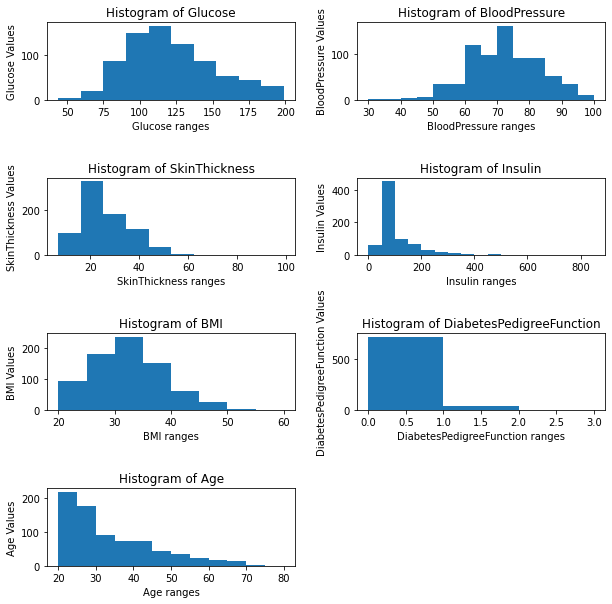

In [6]:
# Creating histograms of different variables before standardization
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=1,wspace=.25)
plt.subplot(4, 2, 1)
plt.hist(df_merged['Glucose'])
# Adding extra features   
plt.xlabel("Glucose ranges")
plt.ylabel("Glucose Values")
plt.title('Histogram of Glucose')
plt.subplot(4, 2, 2)
plt.hist(df_merged['BloodPressure'], bins = range(30,105,5))
# Adding extra features   
plt.xlabel("BloodPressure ranges")
plt.ylabel("BloodPressure Values")
plt.title('Histogram of BloodPressure')
plt.subplot(4, 2, 3)
#ax.hist(data['SkinThickness'], bins = range(5,25,2))
plt.hist(df_merged['SkinThickness'])
# Adding extra features   
plt.xlabel("SkinThickness ranges")
plt.ylabel("SkinThickness Values")
plt.title('Histogram of SkinThickness')
plt.subplot(4, 2, 4)
plt.hist(df_merged['Insulin'], bins = range(0,900,50))
# Adding extra features   
plt.xlabel("Insulin ranges")
plt.ylabel("Insulin Values")
plt.title('Histogram of Insulin')
plt.subplot(4, 2, 5)
plt.hist(df_merged['BMI'], bins = range(20,65,5))
# Adding extra features   
plt.xlabel("BMI ranges")
plt.ylabel("BMI Values")
plt.title('Histogram of BMI')
plt.subplot(4, 2, 6)
plt.hist(df_merged['DiabetesPedigreeFunction'], bins = range(0,4,1))
# Adding extra features   
plt.xlabel("DiabetesPedigreeFunction ranges")
plt.ylabel("DiabetesPedigreeFunction Values")
plt.title('Histogram of DiabetesPedigreeFunction')
#fig, ax = plt.subplots(1, 1,figsize =(10, 7))
plt.subplot(4, 2, 7)
plt.hist(df_merged['Age'], bins = range(20,85,5))
# Adding extra features   
plt.xlabel("Age ranges")
plt.ylabel("Age Values")
plt.title('Histogram of Age')
# Show plot
plt.show()

we can standardise the data and plot the histograms again

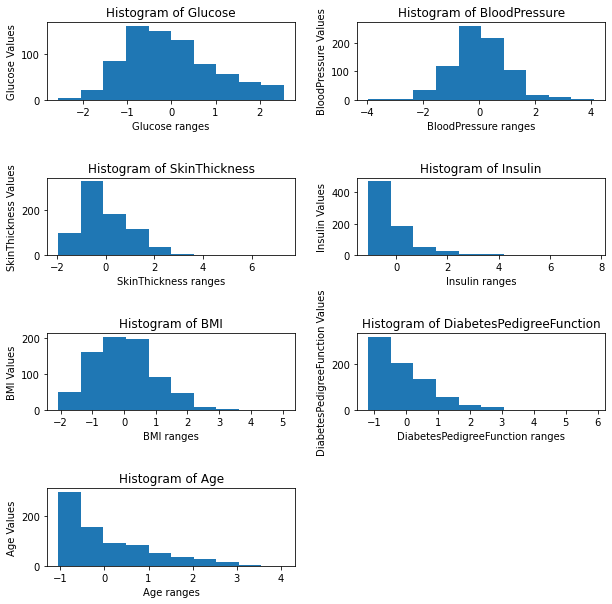

In [7]:
def Standardization(x):
    Standardization = (x-np.mean(x))/np.std(x)
    return Standardization
data = df_merged.drop('Outcome',axis = 1).apply(lambda x: Standardization(x))

# Histograms after standardization
i=1
plt.figure(figsize=(10,10))
for x in data.columns[1:8]:
    #fig, ax = plt.subplots(1, 1,figsize =(10, 7))
    plt.subplot(4, 2, i)
    plt.subplots_adjust(hspace=1,wspace=.25)
    plt.hist(data[x])
    # Adding extra features   
    plt.xlabel("{} ranges".format(x))
    plt.ylabel("{} Values".format(x))
    plt.title('Histogram of {}'.format(x))
    i=i+1 
# Show plot
plt.show()   

There are too many outliers for different variables and dataset is too small to analyse and outliers are nowhere related between the variables too so performing outliers can leads to loss of expensive records which is not recommended so lets preceed with the available data.

# There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

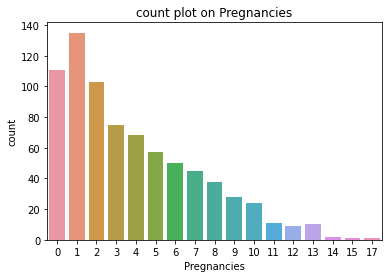

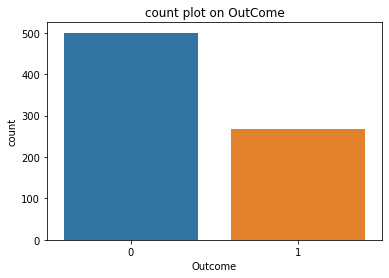

In [8]:
int_type = df_merged.select_dtypes("int64")
float_type = df_merged.select_dtypes("float64")
## It is always a good practice to use frequency plot only for categorical data or with less numeric inputs

# count plot on Pregnancies
sn.countplot(x ='Pregnancies', data = int_type)
plt.title('count plot on Pregnancies')
# Show the plot
plt.show()
# count plot on OutCome
sn.countplot(x ='Outcome', data = int_type)
plt.title('count plot on OutCome')
# Show the plot
plt.show()

# Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

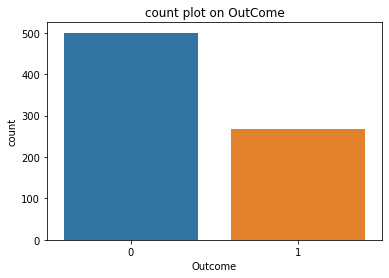

In [9]:
# count plot on OutCome
sn.countplot(x ='Outcome', data = int_type)
plt.title('count plot on OutCome')
# Show the plot
plt.show()

Usually data is said to be imbalanced if the classes are distrubuted in the ratio 1:10, but the above data seems to be not baised on one class since class distribution doesnt fall in the ratio 1:10. Hence the data is balanced. If it would have been imbalanced we would have gone for SMOTE technique sampling

# Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

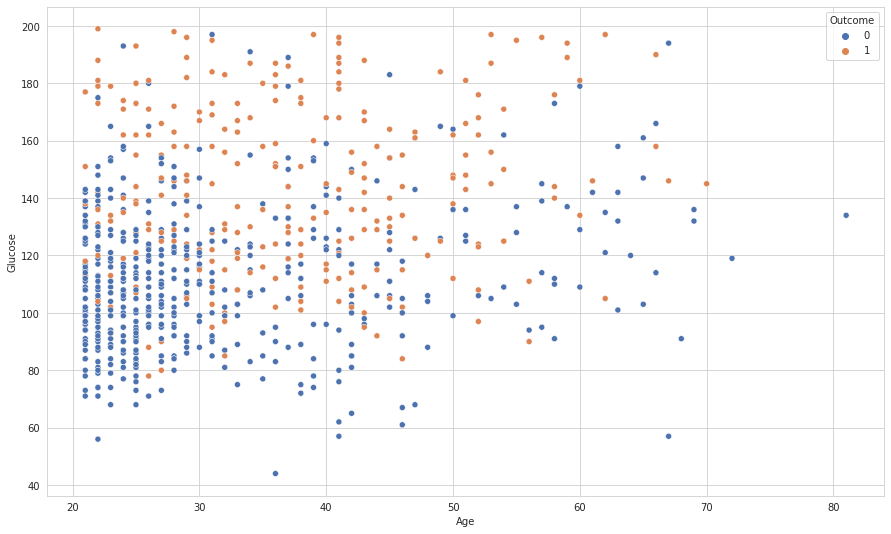

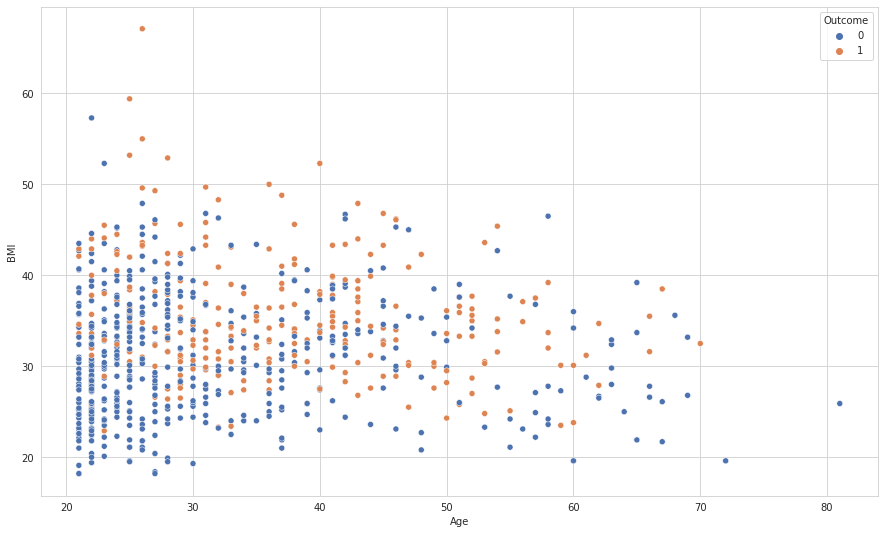

In [10]:
# Realtion between Age, Glucose and label
plt.figure(figsize = (15,9))
sn.set_style('whitegrid')
sn.scatterplot('Age', 'Glucose', data=df_merged, hue='Outcome', palette='deep')
# Realtion between Age, BMI and label
plt.figure(figsize = (15,9))
sn.scatterplot('Age', 'BMI', data=df_merged, hue='Outcome', palette='deep')
plt.show()

From the above graph it is concluded that the patients with less age, less BMI are non diabetic and also all the features are directly related to the diabtes, in the sense more the feature values like BMI, BP, Age, DPF tends to have more chances of diabetes.

# Perform correlation analysis. Visually explore it using a heat map.

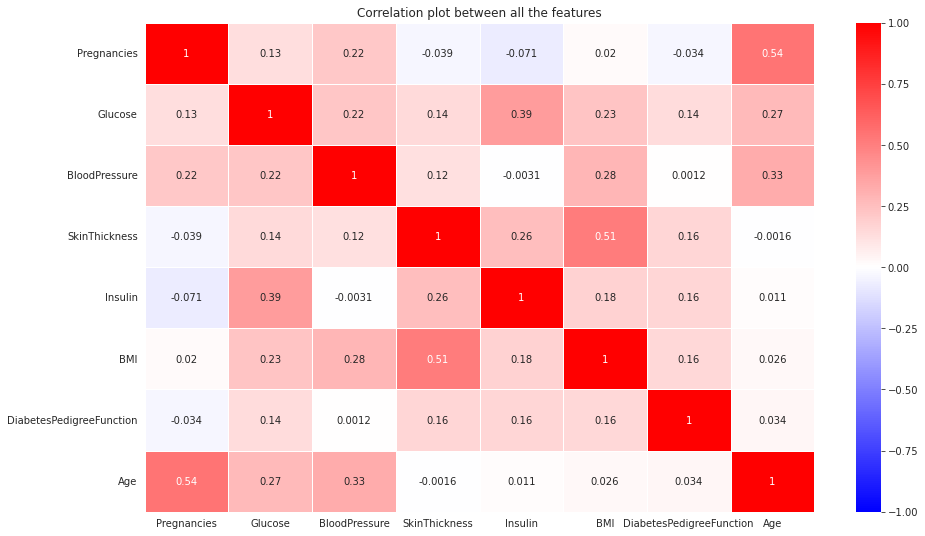

In [11]:
plt.figure(figsize = (15,9))
plt.title("Correlation plot between all the features")
sn.heatmap(data.corr(),cmap='bwr',vmin=-1, vmax=1,annot=True,linewidths=.5)
plt.show()

There are no features which are inversly related to the other or the target variable and also all the features are either directlu related or posses similarity with target variable.

# Project Task: Week 2

# Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

Since, we have few features with small size data also mostly numeric in nature and the labeled feature is of binary class it is good to rely on SVM or Logistic classification algorithm, as with the other may end up underftting or overfitting of the data which is not desirable.
Fitting a SVM classifier can increase dimensions during the model building, in order to add complexity to over come overfitting or underfitting of the model, it is always a good practice to choose SVM classifier than logistic model since it increases more dimensions or complexity

# Apply an appropriate classification algorithm to build a model.

In [12]:
# Fitting a SVM classifier

x = df_merged.drop('Outcome',axis=1)
y = df_merged['Outcome']
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc, RocCurveDisplay, confusion_matrix
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.75,random_state = 1)

svm_model = svm.SVC()
svm_model.fit(xtrain,ytrain)
svm_model.predict(xtrain)
print('SVM Training accuracy: {} %'.format(round(accuracy_score(svm_model.predict(xtrain),ytrain),4)*100))
print('SVM Testing accuracy: {} %'.format(round(accuracy_score(svm_model.predict(xtest),ytest),4)*100))
print('SVM Training Recall: {} %'.format(round(recall_score(svm_model.predict(xtrain),ytrain),4)*100))
print('SVM Testing Recall: {} %'.format(round(recall_score(svm_model.predict(xtest),ytest),4)*100))

# fitting a Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)
print('Logistic Training accuracy: {} %'.format(round(accuracy_score(logmodel.predict(xtrain),ytrain),4)*100))
print('Logistic Testing accuracy: {} %'.format(round(accuracy_score(logmodel.predict(xtest),ytest),4)*100))
print('Logistic Training Recall: {} %'.format(round(recall_score(logmodel.predict(xtrain),ytrain),4)*100))
print('Logistic Testing Recall: {} %'.format(round(recall_score(logmodel.predict(xtest),ytest),4)*100))

SVM Training accuracy: 76.39 %
SVM Testing accuracy: 77.60000000000001 %
SVM Training Recall: 75.61 %
SVM Testing Recall: 79.55 %
Logistic Training accuracy: 77.42999999999999 %
Logistic Testing accuracy: 77.08 %
Logistic Training Recall: 71.97 %
Logistic Testing Recall: 71.93 %


# Compare various models with the results from KNN algorithm.

KNN Training accuracy: 77.95 %
KNN Testing accuracy: 75.52 %
KNN Training Recall: 72.22 %
KNN Testing Recall: 68.33 %


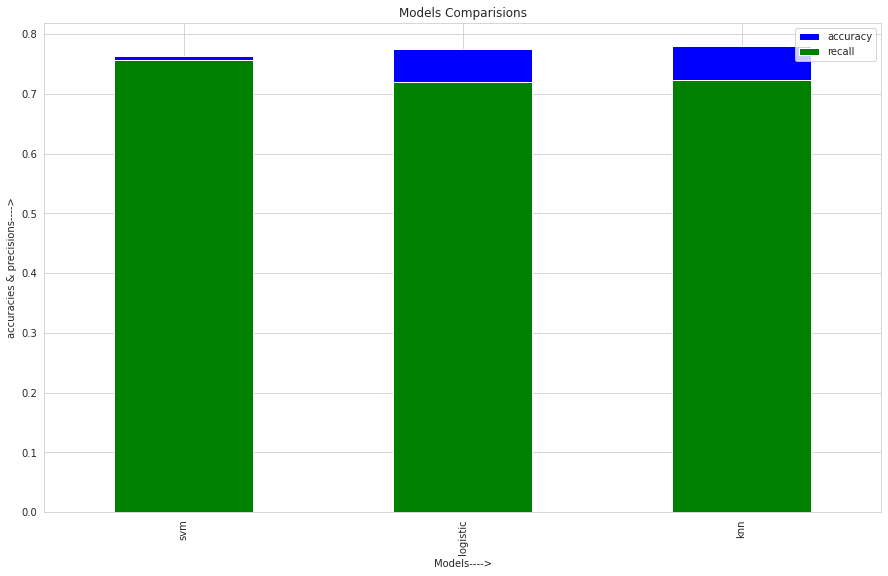

In [20]:
# fittng a KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 7)
knnmodel.fit(xtrain,ytrain)
print('KNN Training accuracy: {} %'.format(round(accuracy_score(knnmodel.predict(xtrain),ytrain),4)*100))
print('KNN Testing accuracy: {} %'.format(round(accuracy_score(knnmodel.predict(xtest),ytest),4)*100))
print('KNN Training Recall: {} %'.format(round(recall_score(knnmodel.predict(xtrain),ytrain),4)*100))
print('KNN Testing Recall: {} %'.format(round(recall_score(knnmodel.predict(xtest),ytest),4)*100))
# Creating a dictionary to compare the models
dct = {'svm' : [round(accuracy_score(svm_model.predict(xtrain),ytrain),4),
                round(recall_score(svm_model.predict(xtrain),ytrain),4)],
          'logistic' : [round(accuracy_score(logmodel.predict(xtrain),ytrain),4),
                round(recall_score(logmodel.predict(xtrain),ytrain),4)],
           'knn' : [round(accuracy_score(knnmodel.predict(xtrain),ytrain),4),
                round(recall_score(knnmodel.predict(xtrain),ytrain),4)]}
results=pd.DataFrame(dct,index = ['accuracy','recall'])
plt.figure(figsize = (15,9))
results.iloc[0,:].plot(kind='bar',color='blue')
results.iloc[1,:].plot(kind='bar',color='green')
plt.title('Models Comparisions')
plt.legend()
plt.xlabel('Models---->')
plt.ylabel('accuracies & precisions---->')
# Show the plot
plt.show()

# from the above models, SVM has outperformed overall in terms of accuary and recall(sensitivity)

# Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

In [14]:
# Calculating True and False Positive rates for different models to get Area Under the ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_score = svm_model.predict(xtrain), y_true = ytrain)
fpr_log, tpr_log, thresholds_log = roc_curve(y_score = logmodel.predict(xtrain), y_true = ytrain)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_score = knnmodel.predict(xtrain), y_true = ytrain)
print('Area under the curve for SVM Classifier: {}'.format(round(auc(fpr_svm,tpr_svm),2)))
print('Area under the curve for Logistic Classifier: {}'.format(round(auc(fpr_log,tpr_log),2)))
print('Area under the curve for KNN Classifier: {}'.format(round(auc(fpr_knn,tpr_knn),2)))

Area under the curve for SVM Classifier: 0.69
Area under the curve for Logistic Classifier: 0.73
Area under the curve for KNN Classifier: 0.73


In [15]:
cm = confusion_matrix(svm_model.predict(xtrain),ytrain)
cm                      #Actual Classes 
#                        0  1
#Predicted classes    0 TN  FP   ---># Specificity (TN/(TN+FP)
#                     1 FN  TP ---># Sensitivity (TP/(FN+TP)

for p in np.array([svm_model,logmodel,knnmodel]):
    cm = confusion_matrix(p.predict(xtrain),ytrain)
    print('{} Training Specificity: {} '.format(p,cm[0,0]/(cm[0,0]+cm[0,1])))
    print('{}  Training Sensitivity: {} '.format(p,cm[1,1]/(cm[1,0]+cm[1,1])))
    cm = confusion_matrix(p.predict(xtest),ytest)
    print('{} Testing Specificity: {} '.format(p,cm[0,0]/(cm[0,0]+cm[0,1])))
    print('{}  Testing Sensitivity: {} '.format(p,cm[1,1]/(cm[1,0]+cm[1,1])))

SVC() Training Specificity: 0.7660044150110376 
SVC()  Training Sensitivity: 0.7560975609756098 
SVC() Testing Specificity: 0.7702702702702703 
SVC()  Testing Sensitivity: 0.7954545454545454 
LogisticRegression() Training Specificity: 0.7947494033412887 
LogisticRegression()  Training Sensitivity: 0.7197452229299363 
LogisticRegression() Testing Specificity: 0.7925925925925926 
LogisticRegression()  Testing Sensitivity: 0.7192982456140351 
KNeighborsClassifier(n_neighbors=7) Training Specificity: 0.8019323671497585 
KNeighborsClassifier(n_neighbors=7)  Training Sensitivity: 0.7222222222222222 
KNeighborsClassifier(n_neighbors=7) Testing Specificity: 0.7878787878787878 
KNeighborsClassifier(n_neighbors=7)  Testing Sensitivity: 0.6833333333333333 


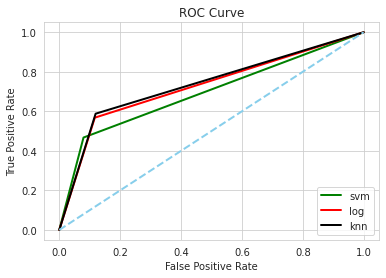

In [16]:
## Roc Plot for different Models
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='green', lw=2)
plt.plot(fpr_log, tpr_log, color='red', lw=2)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2)
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(labels = ['svm','log','knn'],loc="lower right")
plt.show()

# Please be descriptive to explain what values of these parameter you have used.

In [17]:
#exporting the xlxs file with predictions
mapping = {1:'Diabetic', 0:'Non-diabetic'}
df_merged['svm_predictions'] = svm_model.predict(x)
df_merged['svm_predictions'].isna().sum()
df_merged['Outcome']=df_merged['Outcome'].map(mapping)
df_merged['svm_predictions']=df_merged['svm_predictions'].map(mapping)
#df_merged.to_excel('Diabetes_predictions.xlsx')

# Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Pie chart to describe the diabetic or non-diabetic population

Scatter charts between relevant variables to analyze the relationships

Histogram or frequency charts to analyze the distribution of the data

Heatmap of correlation analysis among the relevant variables

Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.